In [1]:

%matplotlib inline
import numpy as np
from scipy import special
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

import pickle as pkl
import networkx as nx

In [2]:
in_deg = 1
expr= "FIM-Mixture-U{}".format(in_deg)
filepath = "{}.pkl".format(expr)
with open(filepath,'rb') as file:
    record = pkl.load(file)

## Animate experiment

In [3]:
record.keys()

dict_keys(['est_locs_log', 'sensor_locs', 'src_locs', 'virtual_leader_locs', 'comm_network'])

In [4]:
record['comm_network'][0].edges

EdgeView([(5, 0), (5, 4), (0, 1), (1, 2), (2, 3), (3, 4)])

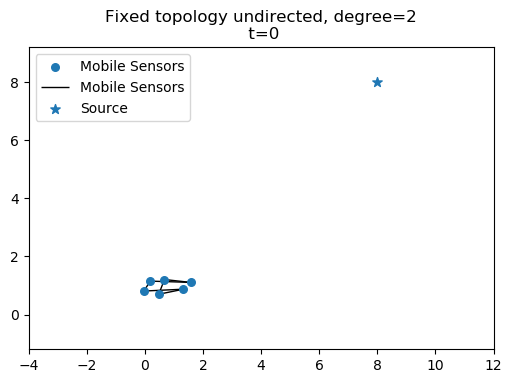

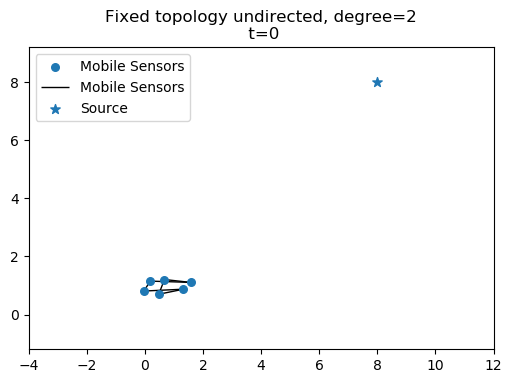

In [5]:
title=r"Fixed topology undirected, degree={}".format(2*in_deg)
ps = np.array([locs for sensor, locs in record['sensor_locs'].items()])
qs = record['src_locs']['source_1']
N_iter = ps.shape[1]

fig, ax = plt.subplots(dpi=100)
def plot_single_frame(j):
    ax.cla()
    G = record['comm_network'][j]
    nx.draw(G,pos=ps[:,j,:],ax=ax,label='Mobile Sensors',node_size=30) # ps.shape=(n_sensors,N_iter,space_dim)
    ax.scatter(qs[j,0],qs[j,1],marker='*',s=50,label='Source')
    ax.axis('on')
    ax.axis('equal')
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    ax.set_xlim((-4,12))
    ax.set_ylim((-4,12))
    ax.legend()
    ax.set_title(title+"\n t={}".format(j))
    plt.show()
    

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, plot_single_frame,
                               frames=N_iter,interval=100)


In [6]:
HTML(anim.to_html5_video())

# Display

## Degree = 2

In [106]:
HTML(anim.to_html5_video())

## Degree = 4

In [90]:
HTML(anim.to_html5_video())

## Fully Connected

In [116]:
HTML(anim.to_html5_video())